In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os
%matplotlib inline
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib

pd.options.display.float_format = '${:,.7f}'.format

# For visualization
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6, brewer
from bokeh.transform import factor_cmap
pd.set_option('display.float_format', lambda x: '%.3f' % x)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"

bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")


In [2]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,ElasticNetCV,Ridge,LassoCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



# ANALYZE ONLY FROM JAN 2003 TO DEC 2017

# Analyze CO Daily

In [3]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_CO
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_co_Daily=bq_assistant.query_to_pandas(query)

In [4]:
## Reference https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
df_co_Daily['date_local'] =  pd.to_datetime(df_co_Daily['date_local'], format='%Y-%m-%d')
##df['Date'].dt.strftime('%Y%m%d')


In [5]:
df_co_Daily=df_co_Daily[df_co_Daily['date_local']>='2003-01-01']

In [6]:
df_co_Daily.set_index('date_local',inplace=True)

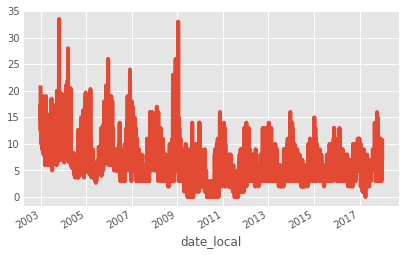

In [7]:
from matplotlib import style
style.use('ggplot')

df_co_Daily['avg_aqi_CO'].plot()

In [8]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_co_Daily['100ma_for_CO'] = df_co_Daily['avg_aqi_CO'].rolling(window=100,min_periods=0).mean()
df_co_Daily.round(2)

df_co_Daily.head(5)

,avg_aqi_CO,100ma_for_CO
date_local,,
2003-01-01,21.000,21.000
2003-01-02,12.500,16.750
2003-01-03,16.500,16.667
2003-01-04,17.000,16.750
2003-01-05,17.500,16.900


In [9]:
# ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1,)
# ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# ax1.plot(df_co_Daily.index, df_co_Daily['avg_aqi_CO'])
# ax1.plot(df_co_Daily.index, df_co_Daily['100ma'])

# plt.show()

# Analyze Ozone Daily

In [10]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_O3
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_o3_Daily=bq_assistant.query_to_pandas(query)
df_o3_Daily['date_local'] =  pd.to_datetime(df_o3_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_o3_Daily=df_o3_Daily[df_o3_Daily['date_local']>='2003-01-01']

df_o3_Daily.set_index('date_local',inplace=True)

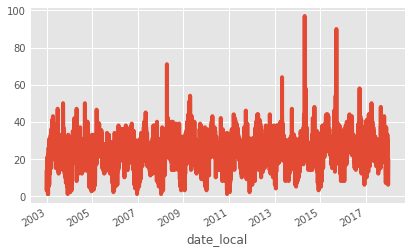

In [11]:
from matplotlib import style
style.use('ggplot')

df_o3_Daily['avg_aqi_O3'].plot()

In [12]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_o3_Daily['100ma_for_Ozone'] = df_o3_Daily['avg_aqi_O3'].rolling(window=100,min_periods=0).mean()
df_o3_Daily.round(2)

df_o3_Daily.head()

,avg_aqi_O3,100ma_for_Ozone
date_local,,
2003-01-01,14.000,14.000
2003-01-02,3.000,8.500
2003-01-03,5.000,7.333
2003-01-04,8.000,7.500
2003-01-05,13.000,8.600


# Analyze Nitrogen Dioxide Daily


In [13]:


query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_NO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_no2_Daily=bq_assistant.query_to_pandas(query)
df_no2_Daily['date_local'] =  pd.to_datetime(df_no2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_no2_Daily=df_no2_Daily[df_no2_Daily['date_local']>='2003-01-01']

df_no2_Daily.set_index('date_local',inplace=True)

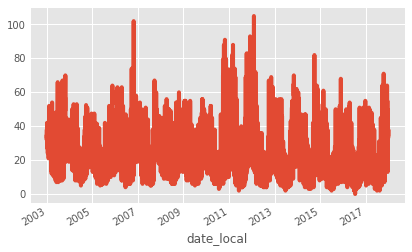

In [14]:
from matplotlib import style
style.use('ggplot')

df_no2_Daily['avg_aqi_NO2'].plot()

In [15]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_no2_Daily['100ma_for_Nitrogen_Dioxide'] = df_no2_Daily['avg_aqi_NO2'].rolling(window=100,min_periods=0).mean()
df_no2_Daily.round(2)

df_no2_Daily.head(5)

,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide
date_local,,
2003-01-01,35.000,35.000
2003-01-02,32.000,33.500
2003-01-03,37.000,34.667
2003-01-04,38.000,35.500
2003-01-05,33.000,35.000


# Analyze Sulphur Dioxide Daily

,avg_aqi_SO2,100ma_for_Sulphur_Dioxide
date_local,,
2003-01-01,6.000,6.000
2003-01-02,10.000,8.000
2003-01-03,11.000,9.000
2003-01-04,9.000,9.000
2003-01-05,14.000,10.000


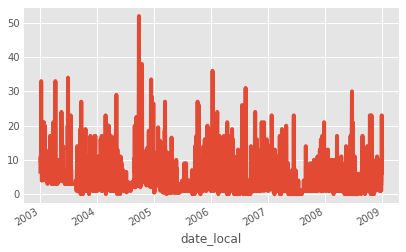

In [16]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_SO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_so2_Daily=bq_assistant.query_to_pandas(query)
df_so2_Daily['date_local'] =  pd.to_datetime(df_so2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_so2_Daily=df_so2_Daily[df_so2_Daily['date_local']>='2003-01-01']
df_so2_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_so2_Daily['avg_aqi_SO2'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_so2_Daily['100ma_for_Sulphur_Dioxide'] = df_so2_Daily['avg_aqi_SO2'].rolling(window=100,min_periods=0).mean()
df_so2_Daily.round(2)

df_so2_Daily.head()

# Analyze Particulate Matter Daily

,avg_aqi_pm25,100ma_for_PM25
date_local,,
2003-01-01,65.000,65.000
2003-01-02,64.000,64.500
2003-01-03,61.000,63.333
2003-01-04,60.000,62.500
2003-01-05,70.000,64.000


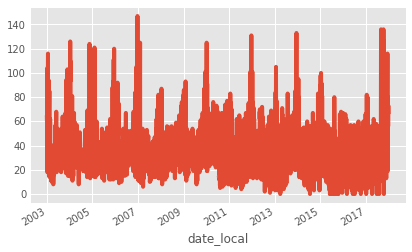

In [17]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_pm25
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_pm25_Daily=bq_assistant.query_to_pandas(query)
df_pm25_Daily['date_local'] =  pd.to_datetime(df_pm25_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_pm25_Daily=df_pm25_Daily[df_pm25_Daily['date_local']>='2003-01-01']
df_pm25_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_pm25_Daily['avg_aqi_pm25'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_pm25_Daily['100ma_for_PM25'] = df_pm25_Daily['avg_aqi_pm25'].rolling(window=100,min_periods=0).mean()
df_pm25_Daily.round(2)
df_pm25_Daily.head()

# Analyze SF Crime Daily

In [18]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT CAST(timestamp AS DATE) as date_local,count(distinct unique_key) as no_of_incidents
FROM `bigquery-public-data.san_francisco.sfpd_incidents`
where category not in ("NON-CRIMINAL")
group by date_local
order by date_local asc
"""

df_sfcrimes_Daily=bq_assistant.query_to_pandas(query)


In [19]:
df_sfcrimes_Daily['date_local'] =  pd.to_datetime(df_sfcrimes_Daily['date_local'], format='%Y-%m-%d')
df_sfcrimes_Daily=df_sfcrimes_Daily[df_sfcrimes_Daily['date_local']<='2017-12-31']


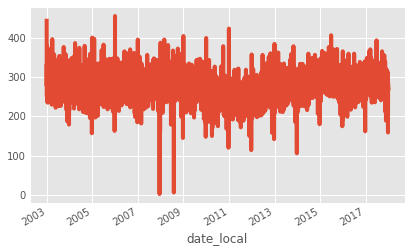

In [20]:
df_sfcrimes_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_sfcrimes_Daily['no_of_incidents'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
# df_sfcrimes_Daily['100ma_for_No_of_Incidents'] = df_sfcrimes_Daily['no_of_incidents'].rolling(window=100,min_periods=0).mean()
# df_sfcrimes_Daily.round(2)

In [21]:
df_sfcrimes_Daily.head()

,no_of_incidents
date_local,
2003-01-01,449
2003-01-02,278
2003-01-03,334
2003-01-04,251
2003-01-05,267


In [22]:
df_co_Daily.shape

(5476, 2)

In [23]:
df_o3_Daily.shape

(5472, 2)

In [24]:
df_no2_Daily.shape

(5465, 2)

In [25]:
df_pm25_Daily.shape

(4153, 2)

In [26]:
df_sfcrimes_Daily.shape

(5478, 1)

In [27]:
## Combine the dataframes ie all
from functools import reduce

df_co_Daily.reset_index(inplace=True)
df_o3_Daily.reset_index(inplace=True)
df_no2_Daily.reset_index(inplace=True)
df_pm25_Daily.reset_index(inplace=True)
df_sfcrimes_Daily.reset_index(inplace=True)

## Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames=[df_co_Daily,df_o3_Daily,df_no2_Daily,df_sfcrimes_Daily,df_pm25_Daily]
df_final = reduce(lambda left,right: pd.merge(left,right,on='date_local'), frames)


In [28]:
df_final.columns

Index(['date_local', 'avg_aqi_CO', '100ma_for_CO', 'avg_aqi_O3',
       '100ma_for_Ozone', 'avg_aqi_NO2', '100ma_for_Nitrogen_Dioxide',
       'no_of_incidents', 'avg_aqi_pm25', '100ma_for_PM25'],
      dtype='object')

In [29]:
df_final.head()

,date_local,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25
0,2003-01-01,21.000,21.000,14.000,14.000,35.000,35.000,449,65.000,65.000
1,2003-01-02,12.500,16.750,3.000,8.500,32.000,33.500,278,64.000,64.500
2,2003-01-03,16.500,16.667,5.000,7.333,37.000,34.667,334,61.000,63.333
3,2003-01-04,17.000,16.750,8.000,7.500,38.000,35.500,251,60.000,62.500
4,2003-01-05,17.500,16.900,13.000,8.600,33.000,35.000,267,70.000,64.000


In [30]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')
df_final["avg_aqi_pm25"]=imp.fit_transform(df_final[["avg_aqi_pm25"]]).ravel()

In [31]:
# ## Optional MinMax Scaling
# from sklearn.preprocessing import MinMaxScaler
# df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']] = MinMaxScaler().fit_transform(df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']])


In [32]:
# ## Optional MinMax Scaling
# from sklearn.preprocessing import StandardScaler
# df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']] = StandardScaler().fit_transform(df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']])
# df_final.shape

# Finding crimes per capita

In [33]:
import pickle
## Deserialize the pickle object to get back the data frame
picle_in=open('population/dataframe.pickle','rb')
df_pop_per_yr=pickle.load(picle_in)

In [34]:
df_pop_per_yr['year'] = df_pop_per_yr['year'].astype(str).replace('\.0', '', regex=True)

In [35]:
df_final.dtypes

date_local                    datetime64[ns]
avg_aqi_CO                           float64
100ma_for_CO                         float64
avg_aqi_O3                           float64
100ma_for_Ozone                      float64
avg_aqi_NO2                          float64
100ma_for_Nitrogen_Dioxide           float64
no_of_incidents                        int64
avg_aqi_pm25                         float64
100ma_for_PM25                       float64
dtype: object

In [36]:
## Reference https://stackoverflow.com/questions/48295624/extract-year-from-date-column-in-dataframe-having-different-date-format-pyth
df_final['year']=pd.to_datetime(df_final['date_local'], format='%Y-%m-%d').dt.year
df_final['year']=df_final['year'].astype(str)

In [37]:
df_daily=pd.merge(df_final, df_pop_per_yr, how='inner', on='year')

In [38]:
df_daily['Incidents_per_population']=df_daily['no_of_incidents']/df_daily['Population']

In [39]:
df_daily.head()

,date_local,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25,year,Population,Incidents_per_population
0,2003-01-01,21.000,21.000,14.000,14.000,35.000,35.000,449,65.000,65.000,2003,766160.000,0.001
1,2003-01-02,12.500,16.750,3.000,8.500,32.000,33.500,278,64.000,64.500,2003,766160.000,0.000
2,2003-01-03,16.500,16.667,5.000,7.333,37.000,34.667,334,61.000,63.333,2003,766160.000,0.000
3,2003-01-04,17.000,16.750,8.000,7.500,38.000,35.500,251,60.000,62.500,2003,766160.000,0.000
4,2003-01-05,17.500,16.900,13.000,8.600,33.000,35.000,267,70.000,64.000,2003,766160.000,0.000


In [40]:
# df_daily[['Incidents_per_population']]=MinMaxScaler().fit_transform(df_daily[['Incidents_per_population']])
## Both the x and ys are on same scale now100,000
df_daily['Incidents_per_population']=df_daily['Incidents_per_population']*100000

In [41]:
df_daily.corr()

,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25,Population,Incidents_per_population
avg_aqi_CO,1.000,0.613,-0.336,-0.460,0.625,0.355,0.182,0.471,0.271,-0.338,0.306
100ma_for_CO,0.613,1.000,-0.103,-0.558,0.321,0.656,0.169,0.144,0.535,-0.433,0.331
avg_aqi_O3,-0.336,-0.103,1.000,0.280,-0.183,-0.033,-0.033,-0.343,-0.157,0.225,-0.117
100ma_for_Ozone,-0.460,-0.558,0.280,1.000,-0.422,-0.402,-0.023,-0.223,-0.621,0.494,-0.207
avg_aqi_NO2,0.625,0.321,-0.183,-0.422,1.000,0.433,0.029,0.431,0.297,-0.246,0.120
100ma_for_Nitrogen_Dioxide,0.355,0.656,-0.033,-0.402,0.433,1.000,-0.154,0.196,0.638,-0.333,-0.022
no_of_incidents,0.182,0.169,-0.033,-0.023,0.029,-0.154,1.000,-0.010,-0.095,0.081,0.928
avg_aqi_pm25,0.471,0.144,-0.343,-0.223,0.431,0.196,-0.010,1.000,0.286,-0.152,0.048
100ma_for_PM25,0.271,0.535,-0.157,-0.621,0.297,0.638,-0.095,0.286,1.000,-0.441,0.074
Population,-0.338,-0.433,0.225,0.494,-0.246,-0.333,0.081,-0.152,-0.441,1.000,-0.293


# Study of Target Variable 

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 33.33 and sigma = 4.57



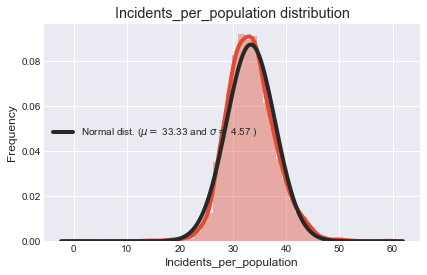

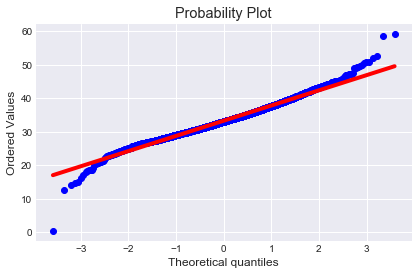

In [42]:
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style('darkgrid')

sns.distplot(df_daily['Incidents_per_population'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_daily['Incidents_per_population'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Incidents_per_population distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_daily['Incidents_per_population'], plot=plt)
plt.show()

In [43]:
# df_daily[['Incidents_per_population']]=StandardScaler().fit_transform(df_daily[['Incidents_per_population']])

# Regression

In [44]:

df_daily.columns

Index(['date_local', 'avg_aqi_CO', '100ma_for_CO', 'avg_aqi_O3',
       '100ma_for_Ozone', 'avg_aqi_NO2', '100ma_for_Nitrogen_Dioxide',
       'no_of_incidents', 'avg_aqi_pm25', '100ma_for_PM25', 'year',
       'Population', 'Incidents_per_population'],
      dtype='object')

In [45]:
X=df_daily[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']]

In [46]:
Y=df_daily['Incidents_per_population']

In [47]:
Y.head()

0   58.604
1   36.285
2   43.594
3   32.761
4   34.849
Name: Incidents_per_population, dtype: float64

In [48]:
X.head()

,avg_aqi_CO,avg_aqi_O3,avg_aqi_pm25,avg_aqi_NO2
0,21.000,14.000,65.000,35.000
1,12.500,3.000,64.000,32.000
2,16.500,5.000,61.000,37.000
3,17.000,8.000,60.000,38.000
4,17.500,13.000,70.000,33.000


In [49]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Incidents_per_population   R-squared:                       0.941
Model:                                  OLS   Adj. R-squared:                  0.941
Method:                       Least Squares   F-statistic:                 1.638e+04
Date:                      Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                              10:14:38   Log-Likelihood:                -14581.
No. Observations:                      4139   AIC:                         2.917e+04
Df Residuals:                          4135   BIC:                         2.919e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
avg_aqi_CO       1.2194      0.045     27.082      0.000       1.131       1.308
avg_aqi_O3       0.7542      0.009     88.480      0.000       0.738       0.771
avg_aqi_pm25     0.1397      0.007     20.349      0.000       0.126       0.153
avg_aqi_NO2      0.0250      0.012      2.158      0.031       0.002       0.048
==============================================================================
Omnibus:                      342.958   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.785
Skew:                          -0.468   Prob(JB):                    2.77e-198
Kurtosis:                       5.097   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Split the Training and Test Set

In [50]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)




(2897, 4) (2897,)
(1242, 4) (1242,)


In [51]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import mean_squared_error, make_scorer

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [52]:
# # Standardize numerical features
# from sklearn.preprocessing import StandardScaler
# stdSc = StandardScaler()
# numeric_feats = ['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']
# X_train.loc[:, numeric_feats] = stdSc.fit_transform(X_train.loc[:, numeric_feats])
# X_test.loc[:, numeric_feats] = stdSc.transform(X_test.loc[:, numeric_feats])

# 1.  Linear Regression without regularization

In [53]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

mods=['Linear_Regression']
vals=[]

vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# vals.append(rmse_cv_test(lr).mean())

RMSE on Training set : 4.295859871058826
RMSE on Test set : 4.344195284111997


r2 train: 0.107, test : 0.122


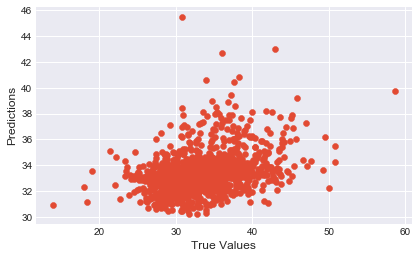

In [54]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## R2 score Evaluation
# y_train_pred=model.predict(X_train)
# y_test_pred=model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))



# Feature Importance in Linear Regression

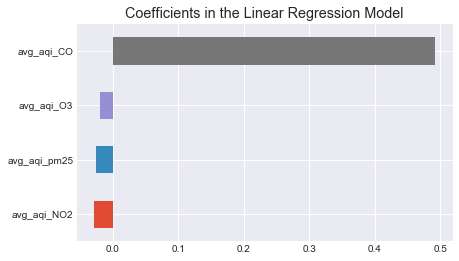

In [55]:
coefs = pd.Series(lr.coef_, index = X_train.columns)
imp_coefs = coefs.sort_values().head(10)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression Model")
plt.show()

# 2 Linear Regression with Ridge regularization (L2 penalty)

In [56]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.001,0.005,0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60,75])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# print(np.sqrt(metrics.mean_squared_error(y_test, y_test_rdg)))


mods.append('Ridge Regressor')
# vals.append(rmse_cv_test(ridge).mean())
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_test_rdg)))


Best alpha : 75.0
Try again for more precision with alphas centered around 75.0
Best alpha : 105.0
Ridge RMSE on Training set : 4.295832014081729
Ridge RMSE on Test set : 4.344032132366812


Ridge picked 4 features and eliminated the other 0 features


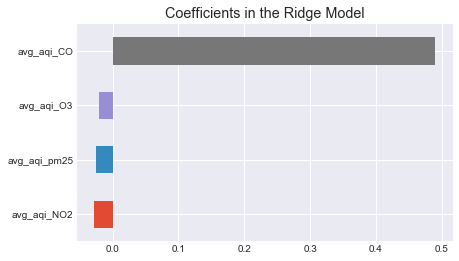

In [57]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = coefs.sort_values().head(10)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

r2 train: 0.107, test : 0.122


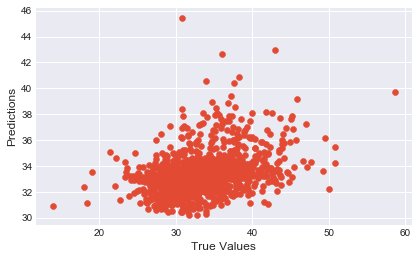

In [58]:
plt.scatter(y_test, y_test_rdg)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## R2 score Evaluation
# y_train_pred=model.predict(X_train)
# y_test_pred=model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_rdg),r2_score(y_test,y_test_rdg) ))


# 3. Linear Regression with Lasso regularization (L1 penalty)

In [59]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# print(np.sqrt(metrics.mean_squared_error(y_test, y_test_las)))


mods.append('Lasso Regressor')
# vals.append(rmse_cv_test(lasso).mean())
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_test_las)))


Best alpha : 0.03
Try again for more precision with alphas centered around 0.03
Best alpha : 0.041999999999999996
Lasso RMSE on Training set : 4.296086818296527
Lasso RMSE on Test set : 4.344243993018937


Lasso picked 4 features and eliminated the other 0 features


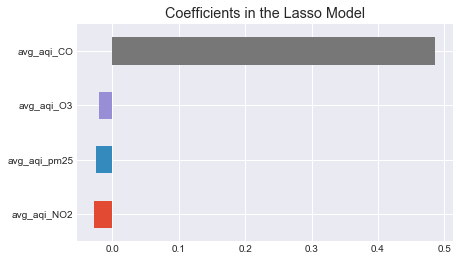

In [60]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = coefs.sort_values().head(10)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

r2 train: 0.107, test : 0.122


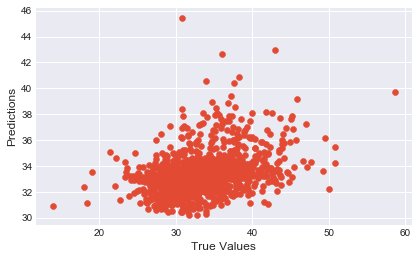

In [61]:
plt.scatter(y_test, y_test_rdg)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## R2 score Evaluation
# y_train_pred=model.predict(X_train)
# y_test_pred=model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_las),r2_score(y_test,y_test_las) ))



# 4. Linear Regression with ElasticNet regularization (L1 and L2 penalty)

In [62]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# print(np.sqrt(metrics.mean_squared_error(y_test, y_test_ela)))


mods.append('ElasticNet Regressor')
# vals.append(rmse_cv_test(elasticNet).mean())
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_test_ela)))

Best l1_ratio : 0.1
Best alpha : 0.1
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.1
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.13999999999999999
ElasticNet RMSE on Training set : 4.296388017950008
ElasticNet RMSE on Test set : 4.344360892018643


ElasticNet picked 4 features and eliminated the other 0 features


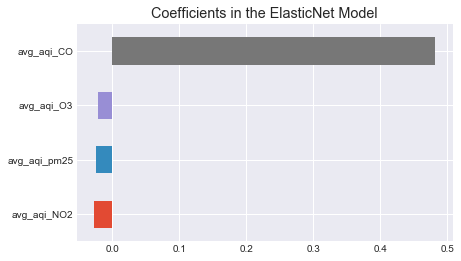

In [63]:
# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = coefs.sort_values().head(10)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

r2 train: 0.107, test : 0.122


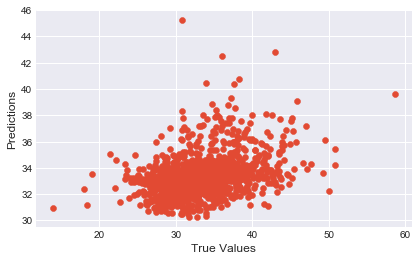

In [64]:
plt.scatter(y_test, y_test_ela)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## R2 score Evaluation
# y_train_pred=model.predict(X_train)
# y_test_pred=model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_ela),r2_score(y_test,y_test_ela) ))


# XgBoost Regression

In [65]:

# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)], 
        'max_depth': [2,3,4],'n_estimators':[100,300],
        'learning_rate': [0.01, 0.1, 1.0]}



In [66]:
# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1,objective='reg:linear',booster='gblinear') 

grid = GridSearchCV(xgb, params,cv=10,scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)

print ("best grid params: ", grid.best_params_)


best grid params:  {'gamma': 0.3, 'learning_rate': 1.0, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 100}


In [67]:
# # grid.best_estimator_

# XGBRegressor(
#         base_score=0.5, booster='gblinear', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0.3, learning_rate=0.01, max_delta_step=0,
#        max_depth=2, min_child_weight=4, missing=None, n_estimators=100,
#        n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1,objective='reg:linear',booster='gblinear')

In [68]:

xg_model=grid.best_estimator_

xg_model.fit(X_train, y_train)
# rmsle_cv(model_lasso).min()
# make predictions on the testing set
y_pred = xg_model.predict(X_test)

# compute the RMSE of our predictions
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mods.append('XgBoost Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# vals.append(rmse_cv_test(grid.best_estimator_).mean())


# 
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Text(0.5,1,'Coefficients in the XgBoost Regression Model')

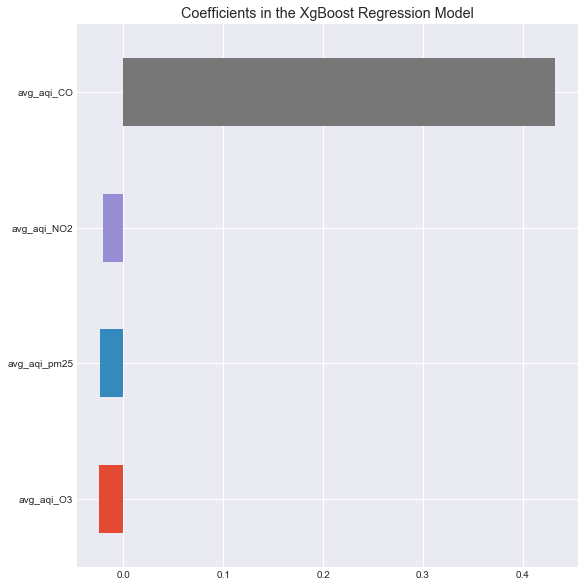

In [69]:
coef = pd.Series(xg_model.coef_, index = X_train.columns)
imp_coef = coef.sort_values().head(10)
                     
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the XgBoost Regression Model")



# Compare RMSE of all the 5 models

In [70]:

ser_df=pd.DataFrame({'Model': mods, 'RMSE_VALUE': vals})
ser_df.sort_values(by='RMSE_VALUE', ascending=True,inplace=True)
source = ColumnDataSource(ser_df)

label_type = source.data['Model'].tolist()

p = figure(x_range=label_type, plot_width=1100, plot_height=700)
color_map = factor_cmap(field_name='Model', palette=Spectral6, factors=mods)
p.vbar(x='Model', top='RMSE_VALUE', source=source, width=0.70, color=color_map)

p.title.text ='Comparison of Models'
p.xaxis.axis_label = 'Model Types'
p.yaxis.axis_label = "RMSE value of different models On Test Set"

show(p)

In [71]:
# # Reference https://www.kaggle.com/jasonbenner/ridge-regression-cv-tutorial
# # https://www.kaggle.com/jsaadani/simple-ridge-regression-in-python
# from sklearn.model_selection import GridSearchCV

# solverOptions = (['svd', 'cholesky', 'sparse_cg', 'sag'])
# fit_interceptOptions = ([True, False])
# alphas = np.linspace(0,1,30)
# model = Ridge(normalize=True)

# grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas,fit_intercept=fit_interceptOptions,
#                                               solver=solverOptions),cv=3,scoring='neg_mean_absolute_error')
# grid.fit(X_train, y_train)

# print ("best grid params: ", grid.best_params_)



In [72]:
# print('Best score: ',grid.best_score_)

In [73]:
ser_df

,Model,RMSE_VALUE
0,Linear_Regression,4.336
1,Ridge Regressor,4.336
2,Lasso Regressor,4.336
3,ElasticNet Regressor,4.336
4,XgBoost Regressor,4.341


In [74]:
vals

[4.3358229661815075,
 4.335885473152236,
 4.336014425324444,
 4.336164000139384,
 4.340587884042037]